Mean Absolute Error: 61.904761904761926


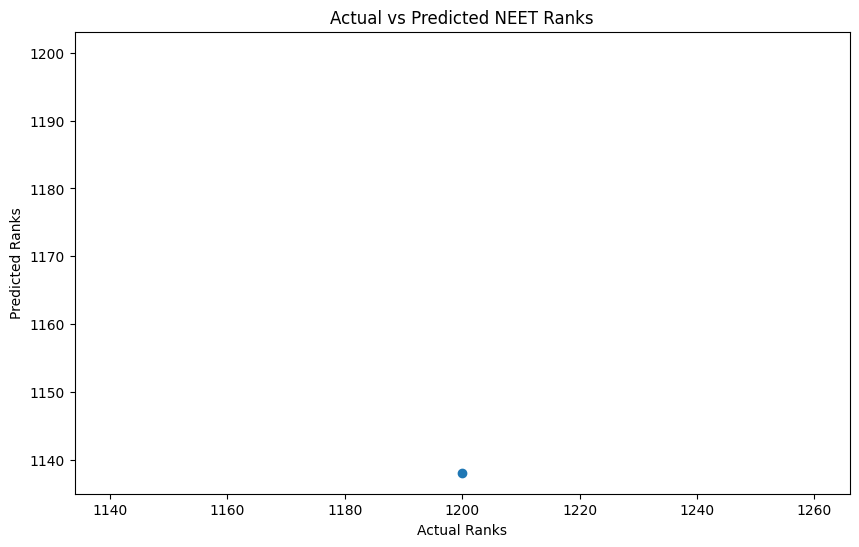


Likely Colleges Based on Predicted Rank:
                                      college_name course_name category  \
1  All India Institute of Medical Sciences (AIIMS)        MBBS      OBC   
5              Maulana Azad Medical College (MAMC)        MBBS      OBC   
6                   Banaras Hindu University (BHU)         BDS  General   
9    University College of Medical Sciences (UCMS)        MBBS       SC   
2          King George's Medical University (KGMU)        MBBS       SC   

   cutoff_rank  cutoff_score  
1         2500           690  
5         3000           685  
6         3500           675  
9         4500           660  
2         5000           650  

Predicted NEET Rank for the individual student: 1500.0

Likely Colleges Based on Individual Student's Predicted Rank:
                                      college_name course_name category  \
0  All India Institute of Medical Sciences (AIIMS)        MBBS  General   
4              Maulana Azad Medical College (MAMC)  

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load Data
quiz_data = pd.read_csv('current_quiz_data.csv')  # Assuming the file contains columns: 'student_id', 'topic', 'question_id', 'selected_option', 'correct_option'
historical_data = pd.read_csv('historicals_quiz_data.csv')  # Assuming columns: 'student_id', 'quiz_id', 'score', 'neet_rank'
colleges = pd.read_csv('college_cutoff.csv')  # Assuming columns: 'college_name', 'cutoff_rank'

# Step 1: Data Preprocessing and Feature Engineering
# Calculate correctness of answers in the quiz data
quiz_data['is_correct'] = quiz_data['selected_option_id'] == quiz_data['correct_answers']

# Calculate average accuracy per topic
topic_accuracy = quiz_data.groupby('topic_id')['is_correct'].mean()

# Calculate historical average score for each student
historical_scores = historical_data.groupby('student_id')['score'].mean()

# For simplicity, we'll assume the accuracy by topic is enough, but you could also include more detailed features
features = pd.DataFrame({
    'avg_score': historical_scores,
    'physics_accuracy': topic_accuracy.get('Physics', 0),
    'chemistry_accuracy': topic_accuracy.get('Chemistry', 0),
    'biology_accuracy': topic_accuracy.get('Biology', 0),
})

# Assuming 'neet_rank' is available in the historical quiz data
labels = historical_data.groupby('student_id')['neet_rank'].first()  # Ensure you're associating rank with the correct student

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Model Training - Linear Regression (can replace with more advanced models)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
predicted_ranks = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predicted_ranks)
print(f"Mean Absolute Error: {mae}")

# Visualizing Predicted vs Actual Ranks
plt.figure(figsize=(10,6))
plt.scatter(y_test, predicted_ranks)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Ranks')
plt.ylabel('Predicted Ranks')
plt.title('Actual vs Predicted NEET Ranks')
plt.show()

# Step 5: Predicting Likely Colleges Based on Predicted Rank
# Sort colleges by cutoff rank
colleges_sorted = colleges.sort_values(by='cutoff_rank')

# Function to predict likely colleges based on predicted rank
def predict_college(predicted_rank, colleges_sorted):
    possible_colleges = colleges_sorted[colleges_sorted['cutoff_rank'] >= predicted_rank]
    return possible_colleges.head(5)  # Returning the top 5 colleges

# Example: Predict the college for a student with predicted rank 2000
predicted_rank = 2000
likely_colleges = predict_college(predicted_rank, colleges_sorted)
print("\nLikely Colleges Based on Predicted Rank:")
print(likely_colleges)

# Example: Predict rank and possible college for an individual student
individual_student_features = pd.DataFrame({
    'avg_score': [75],  # Example score from quizzes
    'physics_accuracy': [0.8],  # Example topic accuracy for Physics
    'chemistry_accuracy': [0.7],  # Example topic accuracy for Chemistry
    'biology_accuracy': [0.9],  # Example topic accuracy for Biology
})

# Normalize the features
individual_student_features = scaler.transform(individual_student_features)

# Predict the rank
predicted_individual_rank = model.predict(individual_student_features)
print(f"\nPredicted NEET Rank for the individual student: {predicted_individual_rank[0]}")

# Predict the most likely colleges
likely_colleges_individual = predict_college(predicted_individual_rank[0], colleges_sorted)
print("\nLikely Colleges Based on Individual Student's Predicted Rank:")
print(likely_colleges_individual)


In [2]:
import pandas as pd

# Sample data
data = {
    'student_id': [101, 101, 102, 103, 101, 102],
    'quiz_id': [1, 1, 1, 1, 2, 2],
    'question_id': [101, 102, 103, 104, 201, 202],
    'selected_option_id': [3, 2, 1, 4, 3, 2],
    'topic_id': [1, 2, 1, 3, 1, 2],
    'difficulty_level': ['easy', 'medium', 'easy', 'hard', 'medium', 'easy'],
    'timestamp': ['2025-02-02 10:00:00', '2025-02-02 10:00:00', '2025-02-02 10:05:00', 
                  '2025-02-02 10:10:00', '2025-02-02 10:30:00', '2025-02-02 10:35:00'],
    'total_questions': [10, 10, 10, 10, 10, 10],
    'correct_answers': [8, 8, 7, 5, 9, 6],
    'time_taken': [120, 120, 150, 180, 110, 140]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_file = 'current_quiz_data.csv'
df.to_csv(csv_file, index=False)

print(f'CSV file saved as {csv_file}')


CSV file saved as current_quiz_data.csv


In [6]:
import pandas as pd

# Sample college cutoff data
data = {
    'college_name': [
        'All India Institute of Medical Sciences (AIIMS)', 'All India Institute of Medical Sciences (AIIMS)',
        'King George\'s Medical University (KGMU)', 'King George\'s Medical University (KGMU)',
        'Maulana Azad Medical College (MAMC)', 'Maulana Azad Medical College (MAMC)',
        'Banaras Hindu University (BHU)', 'Banaras Hindu University (BHU)',
        'University College of Medical Sciences (UCMS)', 'University College of Medical Sciences (UCMS)'
    ],
    'course_name': ['MBBS', 'MBBS', 'MBBS', 'MBBS', 'MBBS', 'MBBS', 'BDS', 'BDS', 'MBBS', 'MBBS'],
    'category': ['General', 'OBC', 'SC', 'ST', 'General', 'OBC', 'General', 'OBC', 'General', 'SC'],
    'cutoff_rank': [1500, 2500, 5000, 6000, 1800, 3000, 3500, 5000, 1200, 4500],
    'cutoff_score': [700, 690, 650, 640, 695, 685, 675, 660, 710, 660]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_file = 'college_cutoff.csv'
df.to_csv(csv_file, index=False)

print(f'CSV file saved as {csv_file}')


CSV file saved as college_cutoff.csv


In [21]:
import pandas as pd

# Sample data for historical_quiz_data.csv file
data = {
    'student_id': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'quiz_id': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'score': [85, 88, 90, 70, 75, 80, 95, 97, 96],
    'neet_rank': [1200, 1150, 1100, 1500, 1400, 1300, 900, 850, 900]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save it as a CSV file
df.to_csv('historicals_quiz_data.csv', index=False)

print("historical_quiz_data.csv file created successfully!")


historical_quiz_data.csv file created successfully!
